##  Step 1 .  Reading , Understanding the visualising the Data

In [205]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [206]:
import numpy as np
import pandas as pd

In [207]:
#  1 .read the data
carprice = pd.read_csv('CarPrice_Assignment.csv')

In [208]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The categorical variable CarName is comprised of two parts 
    - the first word is the name of 'car company' 
    - the second is the 'car model'. 
    
For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
We need to consider only company name as the independent variable for model building.

In [209]:
#carprice['CarName']
# Spliting by space and droping carname column
# carprice['car_company'] = carprice['CarName'].apply(lambda x: x.split( )[0])
# carprice.drop('CarName',axis=1,inplace=True)

# Spliting by space and storing as 'car_company' and 'car model'
carprice[['car_company','car_model']] = carprice['CarName'].str.split(" ", 1, expand=True)
carprice[['car_company','car_model']]

,car_company,car_model
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
5,audi,fox
6,audi,100ls
7,audi,5000
8,audi,4000
9,audi,5000s (diesel)


In [210]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [211]:
carprice.shape

(205, 28)

In [212]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [213]:
# do a sanity check on the dataframe for missing values.
# percentage of missing values in each column
round(carprice.isnull().sum()/len(carprice.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
car_company         0.0
car_model           1.0
dtype: float64

In [214]:
# Dropping Duplicates if any
carprice=carprice.drop_duplicates()
carprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.00,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.00,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.50,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.30,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.00,160,5500,16,22,17859.167,audi,5000s (diesel)


In [215]:
carprice.shape

(205, 28)

In [216]:
#we can drop the car_ID variable which is not relevent for the price modeling
carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)

In [151]:
carprice.shape

(205, 26)

In [152]:
carprice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Make a pairplot of all the numeric variables

In [218]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_company',
       'car_model'],
      dtype='object')

In [219]:
numeric_variables = list(carprice.columns[carprice.dtypes != 'object'])
print(numeric_variables)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [220]:
X = carprice[['price','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

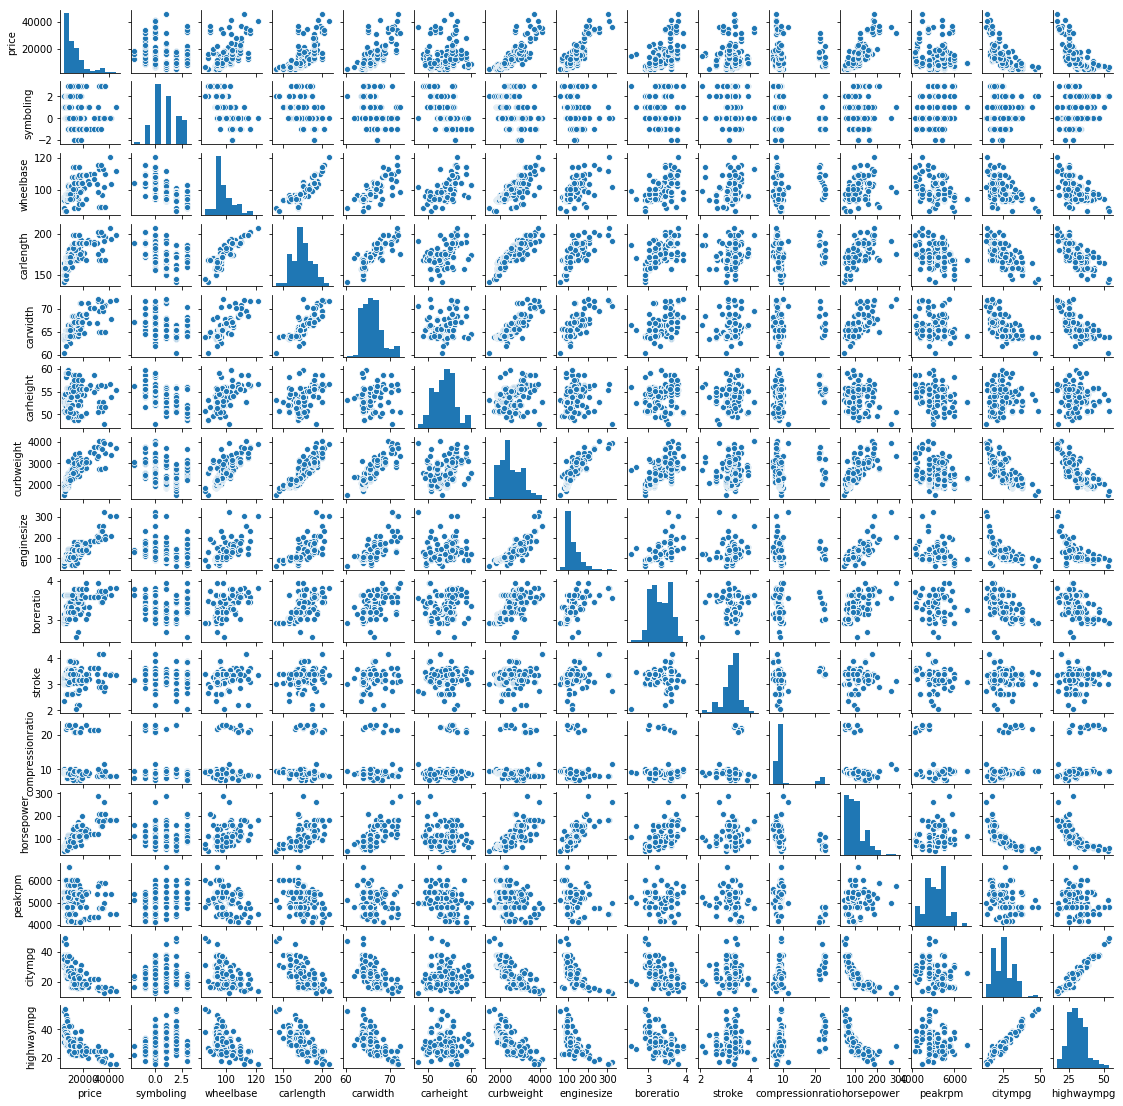

In [221]:
g=sns.pairplot(X)
#plt.figure(figsize=(405,400))
g.fig.set_size_inches(15,15)
plt.show()

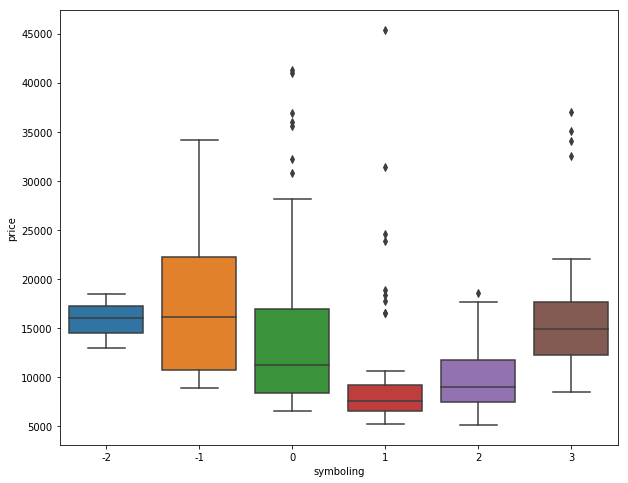

In [222]:
# Visualising the categorical variables
plt.figure(figsize=(10,8))
sns.boxplot(x='symboling',y='price',data=X)
plt.show()

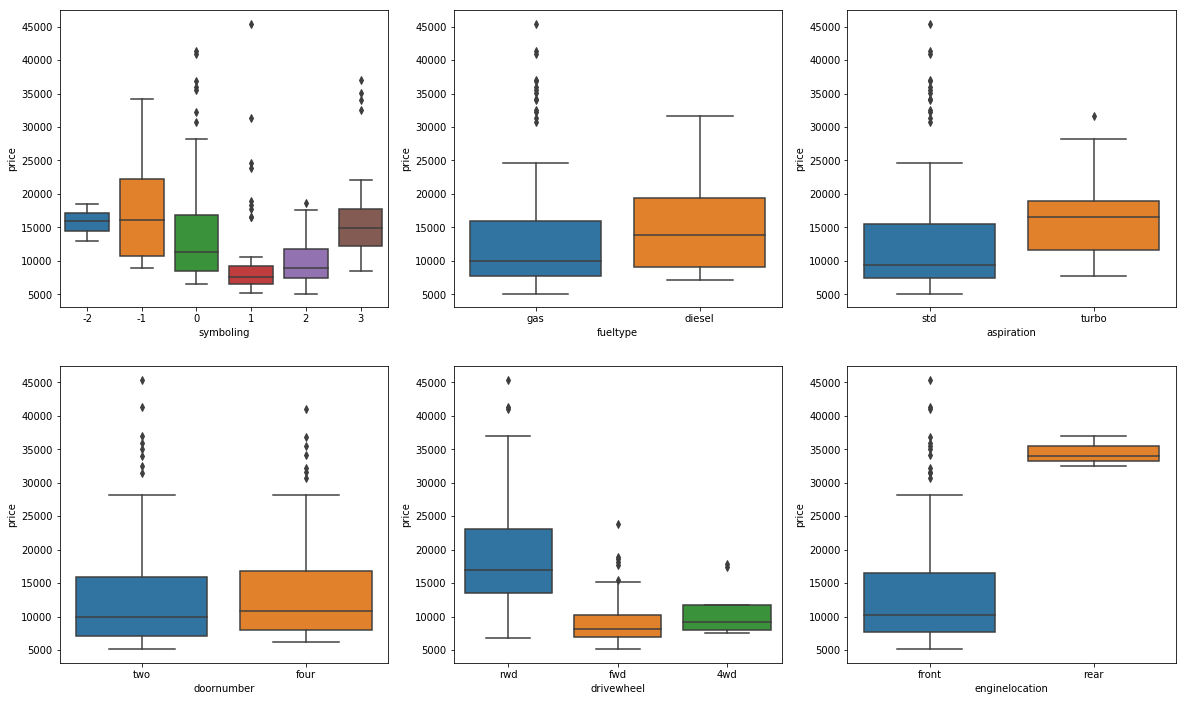

In [223]:
plt.figure(figsize=(20, 12))
#plt.subplot(2,3,1)
#sns.barplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.show()

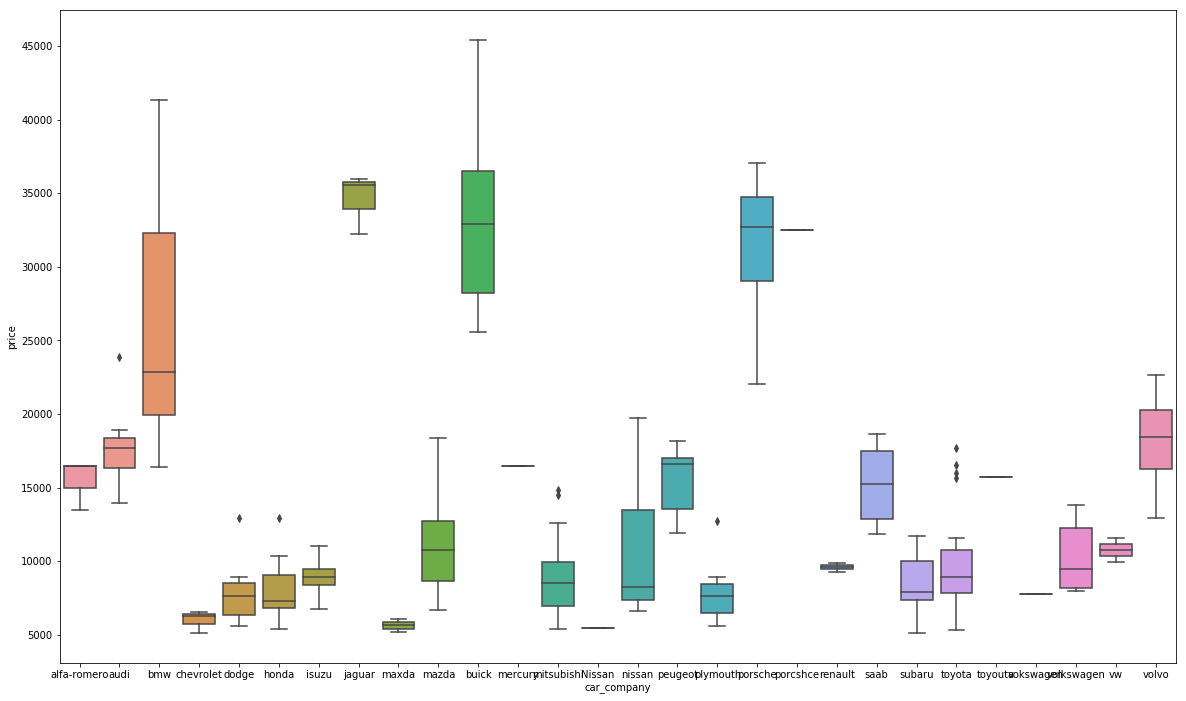

In [224]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'car_company', y = 'price', data = carprice)
plt.show()

## Step 2 : Preparing data for Modelling 


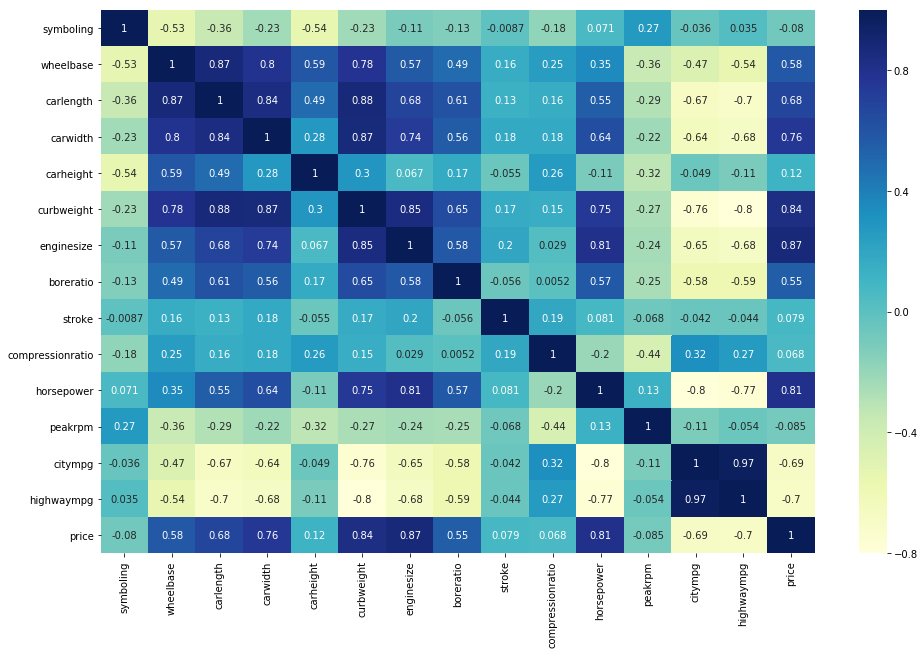

In [225]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
cor=carprice.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

we can have a general sense of which features are related to price. We can spot some features which has some kind of positive relationships going on with the dependent price variable like,

- wheelbase,
- carlength,
- carwidth,
- curbweight,
- enginesize,
- boreratio,
- horsepower.

However, there are also a few variables showing a negative relationship with price variable like,
- citympg,
- highwaympg.

In [226]:

## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [227]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [231]:
# droping car_model column
carprice.drop('car_model',axis=1,inplace=True)

In [232]:
# Collecting Categorical Variable
categorical_variables = list(carprice.columns[carprice.dtypes == 'object'])
categorical_variables

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

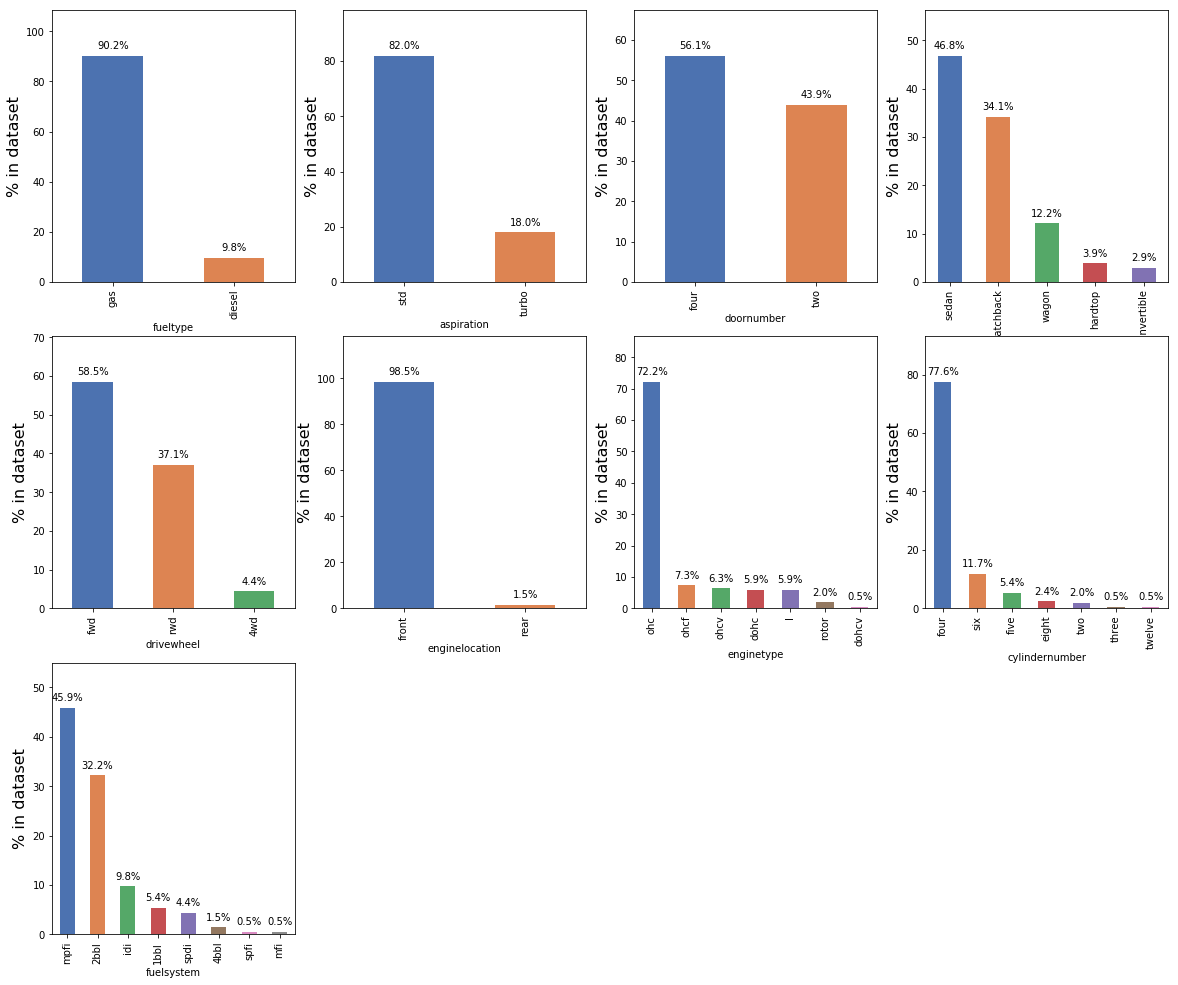

In [233]:
# market percentage of car's with respect to features
plot_percentages(carprice,categorical_variables[:-1])

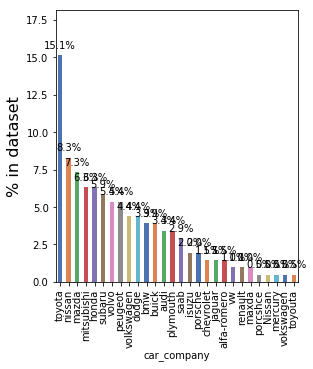

In [234]:
# Most Popular Automobile company in the US Automobile Market
plot_percentages(carprice,[categorical_variables[-1]])

- Toyota clearly has a dominant market percentage in the US of 15.6%.
This is followed by:
- Nissan with 8.8%
- Mazda with 8.2%
- Mitsubishi and Honda are equally popular with 6.3% market percentage.

## Encoding
#Step 1 : Binary Conversion : Convert yes to 1, no to 0 (Non Numerical to Numerical)
#Step 2 : Dummy variable sfor Categorical

Symboling is a categorical variable. 

Symboling is the assigned insurance risk rating,
  -  A value of +3 indicates that the auto is risky.
  - -3 that it is probably pretty safe.
  
Let's make the category clear by classifying based on risk

- -ve symboling as safe
- 0, 1 as moderate
- 2,3 as risky

In [235]:
carprice['symboling'] = carprice['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [236]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [237]:
carprice.shape

(205, 25)

In [238]:
carprice['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [239]:
# Correcting the misspelled company names
carprice['car_company'].replace('maxda','mazda',inplace=True)
carprice['car_company'].replace('Nissan','nissan',inplace=True)
carprice['car_company'].replace('porcshce','porsche',inplace=True)
carprice['car_company'].replace('toyouta','toyota',inplace=True)
carprice['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [240]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()

In [241]:
# Outlier treatment
numeric_variables = list(carprice.columns[carprice.dtypes != 'object'])
print(numeric_variables)


['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [242]:
carprice.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [243]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
carprice['company_segment'] = carprice['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
carprice.drop('car_company',axis=1,inplace=True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


In [244]:

carprice.groupby('company_segment').price.mean()

company_segment
hightier    30788.687500
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

In [245]:
# Collecting Categorical Variable
categorical_variables = list(carprice.columns[carprice.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_segment']

In [246]:
carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0})
carprice['aspiration'] = carprice['aspiration'].map({'std': 1, 'turbo': 0})
carprice['doornumber'] = carprice['doornumber'].map({'two': 1, 'four': 0})
carprice['enginelocation'] = carprice['enginelocation'].map({'front': 1, 'rear': 0})
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


In [247]:
# Creating new variable carLWratio
carprice['carLWratio'] = carprice.carlength/carprice.carwidth
# Creating new variable carWHratio
carprice['carWHratio'] = carprice.carwidth/carprice.carheight
# Creating new variable PWratio
carprice['PWratio'] = carprice.horsepower/carprice.curbweight
# Creating new variable HCmpgratio
carprice['HCmpgratio'] = carprice.highwaympg/carprice.citympg
## droping the orignal variables
carprice.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [248]:
# Creating dummy variables
df = pd.get_dummies(carprice)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 


In [249]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_hi

In [250]:
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl','company_segment_lowtier'],axis=1,inplace=True)

In [252]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
0,1,1,1,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,1,0,0,0,1


## Step 3 : Spliting into trsin and test

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
# Splitting the avilable data into training and testing set.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [257]:
print(df_train.shape)
print(df_test.shape)

(143, 46)
(62, 46)


In [261]:
# Rescaling : 
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [262]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
122,1,1,0,1,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,1,0,0,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,1,0,0,1,0
166,1,1,1,1,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,1,0,0,0,1
199,1,0,0,1,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,1,0,0,0,1


## Dividing into X and Y sets for the model building

In [264]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

In [322]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [323]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [324]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 4),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carLWratio', False, 8),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 15),
 ('symboling_moderate', False, 21),
 ('symboling_safe', False, 11),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 22),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 24),
 ('enginetype_dohc', False, 7),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 18),
 ('enginetype_rotor', False, 19),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_s

In [325]:
col = X_train.columns[rfe.support_]
col # columns supported br RFE

Index(['fueltype', 'enginelocation', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'carWHratio', 'PWratio',
       'carbody_convertible', 'enginetype_dohcv', 'enginetype_ohc',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve',
       'company_segment_hightier'],
      dtype='object')

In [326]:
X_train.columns[~rfe.support_] # columns not supported by RFE

Index(['aspiration', 'doornumber', 'compressionratio', 'carLWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_midtier'],
      dtype='object')

In [ ]:
# Building model using statsmodel, for the detailed statistics


In [327]:
#creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [328]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [329]:
lm = fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.93e-69
Time:                        13:29:06   Log-Likelihood:                 231.05
No. Observations:                 143   AIC:                            -420.1
Df Residuals:                     122   BIC:                            -357.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [330]:
# Adding a constanct variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [331]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [332]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.93e-69
Time:                        13:29:38   Log-Likelihood:                 231.05
No. Observations:                 143   AIC:                            -420.1
Df Residuals:                     122   BIC:                            -357.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5708      0.106      5.406      0.000       0.362       0.780
fueltype                    -0.0853      0.022     -3.884      0.000      -0.129      -0.042
enginelocation              -0.2529      0.065     -3.872      0.000      -0.382      -0.124
wheelbase                    0.2368      0.050      4.709      0.000       0.137       0.336
curbweight                  -0.3303      0.173     -1.909      0.059      -0.673       0.012
enginesize                   0.2956      0.232      1.272      0.206      -0.165       0.756
boreratio                   -0.0627      0.063     -0.992      0.323      -0.188       0.062
stroke                      -0.1938      0.070     -2.776      0.006      -0.332      -0.056
horsepower                   1.8094      0.428      4.226      0.000       0.962       2.657
peakrpm                      0.0617      0.034      1.815      0.072      -0.006       0.129
carWHratio                   0.0807      0.044      1.831      0.070      -0.007       0.168
PWratio                     -1.0391      0.315     -3.303      0.001      -1.662      -0.416
carbody_convertible          0.1366      0.035      3.914      0.000       0.068       0.206
enginetype_dohcv            -0.2977      0.103     -2.898      0.004      -0.501      -0.094
enginetype_ohc               0.0734      0.018      4.175      0.000       0.039       0.108
cylindernumber_eight        -0.1438      0.112     -1.287      0.201      -0.365       0.077
cylindernumber_five         -0.1479      0.063     -2.360      0.020      -0.272      -0.024
cylindernumber_four         -0.1506      0.045     -3.352      0.001      -0.239      -0.062
cylindernumber_six          -0.1717      0.079     -2.178      0.031      -0.328      -0.016
cylindernumber_twelve       -0.5591      0.193     -2.901      0.004      -0.941      -0.178
company_segment_hightier     0.1915      0.025      7.727      0.000       0.142       0.241
==============================================================================
Omnibus:                       32.380   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.158
Skew:                           0.875   Prob(JB):                     3.22e-19
Kurtosis:                       6.351   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- boreratio   has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [333]:
X_train1 = X_train_rfe.drop('boreratio', axis=1)

In [334]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     121.8
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.80e-70
Time:                        13:30:36   Log-Likelihood:                 230.48
No. Observations:                 143   AIC:                            -421.0
Df Residuals:                     123   BIC:                            -361.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- enginesize has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [335]:
X_train2 = X_train1.drop('enginesize', axis=1)

In [336]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     128.9
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.33e-71
Time:                        13:30:53   Log-Likelihood:                 230.11
No. Observations:                 143   AIC:                            -422.2
Df Residuals:                     124   BIC:                            -365.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [338]:
# carWHratio   
X_train3 = X_train2.drop('cylindernumber_eight', axis=1)
lm3=fit_LRM(X_train3)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     137.4
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.02e-72
Time:                        13:32:02   Log-Likelihood:                 230.02
No. Observations:                 143   AIC:                            -424.0
Df Residuals:                     125   BIC:                            -370.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [339]:
X_train4 = X_train3.drop('peakrpm', axis=1)
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     143.2
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.25e-72
Time:                        13:33:03   Log-Likelihood:                 228.16
No. Observations:                 143   AIC:                            -422.3
Df Residuals:                     126   BIC:                            -372.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [340]:
X_train5 = X_train4.drop('curbweight', axis=1)
lm5=fit_LRM(X_train5) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     148.2
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           9.60e-73
Time:                        13:33:41   Log-Likelihood:                 225.58
No. Observations:                 143   AIC:                            -419.2
Df Residuals:                     127   BIC:                            -371.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [341]:
X_train6 = X_train5.drop('carWHratio', axis=1)
lm6=fit_LRM(X_train6)


                   

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     154.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           6.60e-73
Time:                        13:34:46   Log-Likelihood:                 223.13
No. Observations:                 143   AIC:                            -416.3
Df Residuals:                     128   BIC:                            -371.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [344]:
X_train7 = X_train6.drop('stroke', axis=1)
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     158.1
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.62e-72
Time:                        13:40:20   Log-Likelihood:                 219.25
No. Observations:                 143   AIC:                            -410.5
Df Residuals:                     129   BIC:                            -369.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [345]:
 
X_train8 = X_train7.drop('cylindernumber_five', axis=1)
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     165.4
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.62e-72
Time:                        13:41:37   Log-Likelihood:                 216.38
No. Observations:                 143   AIC:                            -406.8
Df Residuals:                     130   BIC:                            -368.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [346]:
 
X_train9 = X_train8.drop('cylindernumber_twelve', axis=1)
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     177.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.52e-73
Time:                        13:42:41   Log-Likelihood:                 214.68
No. Observations:                 143   AIC:                            -405.4
Df Residuals:                     131   BIC:                            -369.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [347]:
X_train10 = X_train9.drop('cylindernumber_six', axis=1)
lm10=fit_LRM(X_train10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.0
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           8.41e-74
Time:                        13:43:24   Log-Likelihood:                 213.82
No. Observations:                 143   AIC:                            -405.6
Df Residuals:                     132   BIC:                            -373.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [348]:
X_train11 = X_train10.drop('fueltype', axis=1)
lm11=fit_LRM(X_train11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.40e-74
Time:                        13:44:14   Log-Likelihood:                 211.37
No. Observations:                 143   AIC:                            -402.7
Df Residuals:                     133   BIC:                            -373.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [349]:
X_train12 = X_train11.drop('enginetype_dohcv', axis=1)
lm12=fit_LRM(X_train12)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     231.5
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.60e-74
Time:                        13:45:05   Log-Likelihood:                 209.71
No. Observations:                 143   AIC:                            -401.4
Df Residuals:                     134   BIC:                            -374.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [358]:
 
X_train13 = X_train12.drop('enginetype_ohc', axis=1)
lm13=fit_LRM(X_train13)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     250.7
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           4.34e-74
Time:                        13:52:09   Log-Likelihood:                 205.64
No. Observations:                 143   AIC:                            -395.3
Df Residuals:                     135   BIC:                            -371.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [359]:
X_train14 = X_train13.drop('PWratio', axis=1)
lm14=fit_LRM(X_train14)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           3.56e-72
Time:                        13:54:20   Log-Likelihood:                 197.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [360]:
X_train15 = X_train14.drop('enginelocation', axis=1)
lm15=fit_LRM(X_train15)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.62e-71
Time:                        13:55:30   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [353]:
X_train15.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'PWratio',
       'carbody_convertible', 'cylindernumber_four',
       'company_segment_hightier'],
      dtype='object')

In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [365]:
getVIF(X_train15)  # We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

,Features,VIF
0,const,20.03
2,horsepower,2.05
4,cylindernumber_four,1.93
5,company_segment_hightier,1.61
1,wheelbase,1.32
3,carbody_convertible,1.07


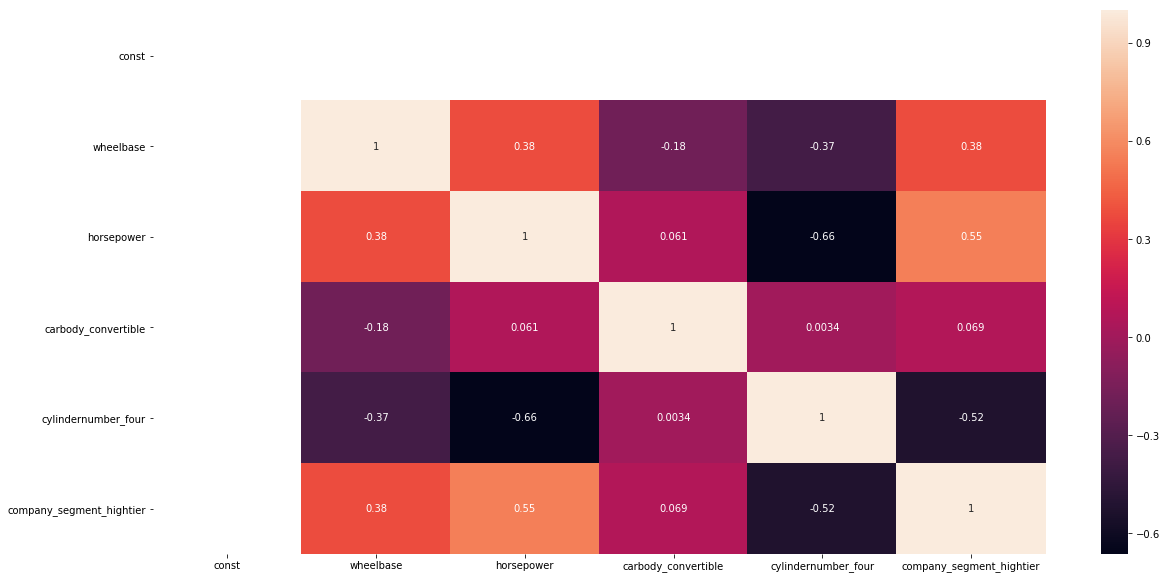

In [362]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train15.corr(),annot = True)

In [363]:
X_train15 = sm.add_constant(X_train15)
lm16 = sm.OLS(y_train,X_train15).fit() 
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.62e-71
Time:                        13:57:11   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- All the independent variable have considerably low VIF and the Adj. R-Squared is 0.910 which is quite a significant fit.


In [364]:
# Residual  Analysis of the train data

In [366]:
y_train_price = lm16.predict(X_train15)

In [367]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

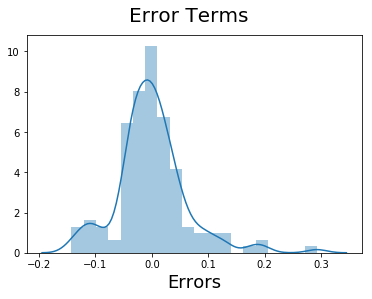

In [368]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final

In [369]:
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

## Dividing into X_test and y_test

In [370]:
y_test = df_test.pop('price')
X_test = df_test


In [371]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train15= X_train15.drop(['const'], axis=1)
X_test_new = X_test[X_train15.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [372]:
# Making predictions
y_pred = lm16.predict(X_test_new)

Text(0, 0.5, 'y_pred')

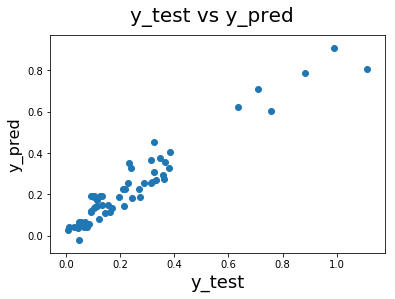

In [373]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

 y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.



In [374]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06831639620741776
Model r2_score: 0.9126794364569675


We can see that the equation of our best fitted line is:

$ price = -0.0163 + 0.3249  \times  wheelbase + 0.4945 \times horsepower + 0.1835 \times carbody\_convertible - 0.0623 \times cylindernumber\_four + 0.2580 \times company\_segment\_hightier $